<img src="images/cs5228-header-title.png" />

# Assignment 3 - Tree-Based Models (50 Points)

Hello everyone, this assignment notebook covers Tree-Based Models. There are some code-completion tasks and question-answering tasks in this answer sheet. For code completion tasks, please write down your answer (i.e., your lines of code) between sentences that "Your code starts here" and "Your code ends here". The space between these two lines does not reflect the required or expected lines of code. For answers in plain text, you can refer to [this Markdown guide](https://medium.com/analytics-vidhya/the-ultimate-markdown-guide-for-jupyter-notebook-d5e5abf728fd) to customize the layout (although it shouldn't be needed).

When you work on this notebook, you can insert additional code cells (e.g., for testing) or markdown cells (e.g., to keep track of your thoughts). However, before the submission, please remove all those additional cells again. Thanks!

**Important:** 
* Remember to rename and save this Jupyter notebook as **A3_YourName_YourNUSNETID.ipynb** (e.g., **A3_BobSmith_e12345678.ipynb**) before submission!
* Remember to rename and save the Python script file **A3_YourName_YourNUSNETID.py** (e.g., **A3_BobSmith_e12345678.py**) before submission!
* Submission deadline is **Oct 24, 11.59 pm**. Late submissions will be penalized by 10% for each additional day. Failure to appropriately rename both files will yield a penalty of 1 Point. There is no need to use your full name if it's rather long; it's just important to easily identify you in Canvas etc.

Please also add your NUSNET and student id in the code cell below. This is just to make any identification of your notebook doubly sure.

In [21]:
student_id = 'A0255954R'
nusnet_id = 'e0962966'

Here is an overview over the tasks to be solved and the points associated with each task. The notebook can appear very long and verbose, but note that a lot of parts are there to provide additional explanations, documentation, or some discussion. The code and markdown cells you are supposed to complete are well marked, but you can use the overview below to double-check that you covered everything.

* **1 Decision Trees (20 Points)**
    * 1.1 Implementing a Decision Tree Regressor (8 Points)
        * 1.1 a) Finding the Best Split (4 Points)
        * 1.1 b) Training the Decision Tree Regressor (4 Points)
    * 1.2 Towards Improving `MyDecisionTreeRegressor` (6 Points)
        * 1.2 a) Speeding up the Performance (3 Points)
        * 1.2 b) Supporting Different Feature Types (3 Points)
    * 1.3 Questions about Decision Trees (6 Points)
        * 1.3 a) Decision Trees and Outliers (3 Points)
        * 1.3 b) Manually Playing a Decision Tree Classifier (3 Points)
* **2 Tree Ensembles (20 Points)**
    * 2.1 Implementing a Random Forest Regressor (8 Points)
        * 2.1 a) Implementing Bagging (2 Points)
        * 2.1 b) Implementing Feature Sampling (2 Points)
        * 2.1 c) Training the Random Forest Regressor (2 Points)
        * 2.1 d) Predicting Output Values (2 Points)
    * 2.2 Implementing a Gradient Boosting Regressor (8 Points)
        * 2.2 a) Training the Gradient-Boosted Regressor (6 Points)
        * 2.2 b) Predicting Output Values (2 Points)
    * 2.3 Questions about Tree Ensembles (4 Points)
        * 2.3 a) Random Forest: Bagging Only vs. Bagging + Feature Sampling (2 Points)
        * 2.3 b) Random Forest: Regression vs. Classification (2 Points)
* **3 Evaluation of Tree-Based Models (10 Points)**
    * 3.1 Data Preprocessing (2 Points)
    * 3.2 Basic K-Fold Cross Validation (8 Points)
        * 3.2a) Comparing Tree-Based Regression Models (5 Points)
        * 3.2b) Assessing the Evaluation (3 Points)        

## Setting up the Notebook

In [32]:
# Some magic so that the notebook will reload the external python script file any time you edit and save the .py file;
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Making all the required imports:

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Only used for comparison with your own implementation :)
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_validate

from src.utils import *

**Important:** This notebook also requires you to complete in a separate `.py` script file. This keeps this notebook cleaner and simplifies testing your implementations for us. As you need to rename the file `A3.py`, you also need to edit the import statement below accordingly.

In [34]:
from A3_WuTong_e0962966 import MyDecisionTreeRegressor, MyRandomForestRegressor, MyGradientBoostingRegressor
#from A1b_BobSmith_e12345678 import MyDecisionTreeRegressor, MyRandomForestRegressor, MyGradientBoostingRegressor # <-- you will need to rename this accordingly

----------

## 1 Decision Trees (20 Points)

Decision Trees are a very common classification and regression model on their own, but even more so as the core building block of ensemble models. As such, a solid understanding of Decision Trees -- including their strengths and limitations -- is important to also understand these more advanced ensemble models, like Random Forests or Gradient Boosting Trees.

### 1.1 Implementing a Decision Tree Regressor

In this section, you will implement your own Decision Tree regressor. This will test but also deepen your understanding of the inner workings of Decision Trees. The keep the complexity low, the Decision tree will be simplified compared to the general model you've seen in the lecture:

* Only numerical features are supported
* Only binary splits are supported

(incidentally, this is in line with scitkit-learn's [`DecisionTreeRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) implementation)

In the file `A2a_script.py`, you can find the skeleton code for the class `MyDecisionTreeRegressor`. Note that many parts of the implementation are given to you. Have a good look at the provided code to understand its different components.

**In the following subtasks, you will complete the methods where indicated by the comments within each method.** No need to worry, we will guide you through the implementation step by step.

#### Provided Methods (nothing for you to do here!)

Recall from the lecture, that the RSS score of a node is defined as:

$$RSS_{node} = \sum_{i\in R_{node}} (y_i - \mu_{R_{node}})^2$$

where $R_{node}$ is the set of output values of the $node$, and $\mu_{R_{node}}$ is the mean of the values in $R_{node}$.

Analogously, the RSS score of a split is defined as:

$$RSS_{split} = \sum_{k=1}^K\sum_{i\in R_k} (y_i - \mu_{R_k})^2$$

where $K$ is the number of child nodes (here $K=2$ since all splits are binary splits), $R_k$ is the set of output values in child node $k$, and $\mu_{R_k}$ is the mean of the values in $R_k$.

Since calculating the RSS scores only involves some very basic arithmetic operations, we give you the two methods `calc_rss_score_node` and `calc_rss_score_split` for free. Have a look at both methods to convince yourself that these methods implement the formulas given above. Again, since we consider only binary splits, method `calc_rss_score_split` simplifies to calling `calc_rss_score_node` twice on both child nodes and summing up both scores.

We also provide you with the method `calc_thresholds()` that returns all meaningful thresholds for a single feature (represented by the list of values of this feature for all data samples). In principle, there are different possible approaches. Here, we consider the basic method covered in the lecture, where we derive all thresholds as the values between two adjacent feature values. You can test the implementation of this method using the code cell below; it shows for three different inputs the expected outputs.

In [39]:
values1 = np.array([4, 1, 2, 1, 1, 3])
values2 = np.array([1, 2, 3, 4, 5, 6])
values3 = np.array([8, 0, 0, 1, 0, 0])

my_regressor = MyDecisionTreeRegressor()

print(my_regressor.calc_thresholds(values1))  # Expected output: [1.5 2.5 3.5]
print(my_regressor.calc_thresholds(values2))  # Expected output: [1.5 2.5 3.5 4.5 5.5]
print(my_regressor.calc_thresholds(values3))  # Expected output: [0.5 4.5]

[1.5 2.5 3.5]
[1.5 2.5 3.5 4.5 5.5]
[0.5 4.5]


Lastly, we provide you the method `create_split()` to split a list `x` of feature values with respect to a threshold. Note that the method returns not the values themselves but the indices of the values. By giving you this method, we can ensure that everyone should get the exact same result, as well as that the results will match with the Decision Tree implementation of scikit-learn. For example, `create_split()` puts all samples `<=` then the threshold into the left child node (and all others into the right child node). However, there would be no principle difference to put them in the right child node (and all others into the left child node). It's purely a convention to ensure consistency. Again, have a good look at `create_split()` to understand its inputs, inner workings, and output.

#### 1.1 a) Finding the Best Split (4 Points)

Finding the best split is at the heart of training of a Decision Tree. As we saw in the lecture, the best split is defined by which

* feature *and*

* threshold

result in a split of the data samples yielding the best score (here: the split with the lowest RSS score). We already have the methods to calculate the RSS scores of a node and a split, as well as to calculate the thresholds to be considered for a given feature. Finding the best split essentially boils simply down to checking for each feature and all corresponding thresholds to check which split gets the lowest RSS score.

To test your implementation, let's first define a small toy dataset of 20 data samples. The two input features are the `weight` (in kg) and `height` (in cm) of a person, and the output value (i.e., the predicted variable) are the blood sugar level (in mmol/L).

In [40]:
weights = np.array([68, 71, 92, 59, 80, 81, 75, 88, 45, 64, 59, 87, 80, 73, 55, 92, 93, 72, 49, 57])
heights = np.array([175, 175, 170, 168, 184, 184, 167, 155, 152, 163, 190, 161, 160, 174, 159, 183, 165, 181, 179, 154])

X_toy = np.stack((weights, heights), axis=1)
y_toy = np.array([7.8, 7.7, 11.0, 7.9, 6.8, 7.9, 6.3, 9.5, 8.1, 9.0, 6.0, 10.1, 7.0, 7.8, 7.7, 10.2, 9.8, 7.0, 6.4, 7.6])

print('Toy dataset -- #samples: {}, #features: {}'.format(X_toy.shape[0], X_toy.shape[1]))

Toy dataset -- #samples: 20, #features: 2


**Implement method `calc_best_split`** to find the best split with respect to all features and corresponding thresholds. You obviously can and should make use of the existing methods you have implemented or are already provided to you. The skeleton code of method `calc_best_split()` shows you which values need to be returned. Appreciate that those are the values that

* define a split (`best_feature_idx`, `best_threshold`)

* decide whether to split or not (`best_score`)

* recursively built the Decision Tree (`best_split`, which is a tuple containing the left and right child indices)

You can use the code cell below to test your implementation of the method. The following markdown cell shows the expected outcomes. As your implementation of the Decision Tree regressor does not contain any randomness (e.g., through various heuristics to improve performance), your results should match the expected outcome.

In [43]:
my_regressor = MyDecisionTreeRegressor()

score, threshold, feature_idx, split = my_regressor.calc_best_split(X_toy, y_toy)

In [44]:
print("Best feature index:   {} (0=weight, 1=height)".format(feature_idx))
print("Best threshold:       {} (for the best feature)".format(threshold))
print("#samples (left)       {}".format(len(split[0])))
print("#samples (right)      {}".format(len(split[1])))

Best feature index:   0 (0=weight, 1=height)
Best threshold:       84.0 (for the best feature)
#samples (left)       15
#samples (right)      5


The code cell above should yield the following output:
    
```
Best feature index:   0 (0=weight, 1=height)
Best threshold:       84.0 (for the best feature)
#samples (left)       15
#samples (right)      5
```

You can now also compare your implementation with scitkit-learn's [`DecisionTreeRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) implementation. Since we are only interested in the first split here -- that is, we are only interested in the root node and its two children -- we can set `max_depth=1`.

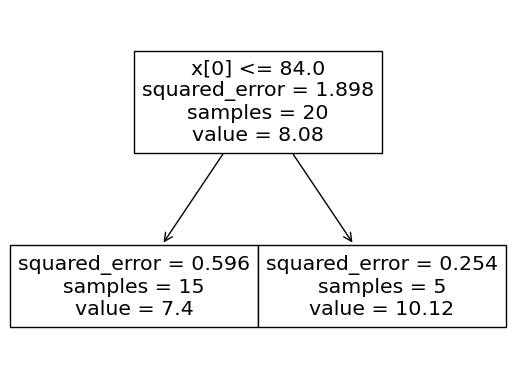

In [45]:
sk_regressor = DecisionTreeRegressor(max_depth=1).fit(X_toy, y_toy)

plt.figure()
plot_tree(sk_regressor)
plt.show()

The information in the box for the root node reflects the feature index and threshold for the best split; the boxes for the two child nodes show you the number of samples in both children. Of course, all that information should match your results from above.

#### 1.1 b) Training the Decision Tree Regressor (4 Points)

With all the methods for scoring and splitting nodes in place, we can now train our Decision Tree. To this end, let's first load a small dataset. We use the [Hitters](https://www.kaggle.com/floser/hitters) dataset which aims to predict the salaries of baseball players based on their statistics. You can check the website for more details about the different features. In the following, we just consider a subset of all features to keep it simple.

In [54]:
subset = ['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Years', 'Assists', 'Errors']

df = pd.read_csv('data/a2-hitters.csv')
df = df.dropna(subset=subset+['Salary']) # We ignore all samples with NA values; it's not important here

X = df[subset].to_numpy()
y = df[['Salary']].to_numpy().squeeze()

# Note: sklearn.model_selection.train_test_split also shuffles the data!
# So we need to set random_state to ensure consistent results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print("Size of training set: {}".format(len(X_train)))
print("Size of test: {}".format(len(X_test)))

Size of training set: 210
Size of test: 53


Have a good look at methods `fit()` and `_fit()` and get a good understanding! They basically contain all the code required for recursively splitting nodes. So you don't have to worry about that. The only things missing from the `_fit()` method are the conditions for when to stop the recursion. Some conditions can be checked before calculating the best split, some afterwards (cf. lecture slides, including the ones to avoid overfitting).

**Implement ALL possible conditions to stop the recursion in method `_fit()`, and try to do them as early as possible!** Each condition will be a simple `IF` statement that will `return` if true. (Hint: The 2 parameters `max_depth` and `min_samples_split` are adopted from scikit-learn's [`DecisionTreeRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html); only exception: `min_samples_split` is only interpreted as *int*, scitkit-learn also has a separate interpretation if `min_sample_split` is a *float*))

In [64]:
print('Compare node counts for different values of max_depth')
for max_depth in [1, 3, 5]:
    my_regressor = MyDecisionTreeRegressor(max_depth=max_depth).fit(X_train, y_train)
    sk_regressor = DecisionTreeRegressor(max_depth=max_depth).fit(X_train, y_train)
    print('{} vs {}'.format(sk_regressor.tree_.node_count, my_regressor.get_node_count()))

print('\nCompare node counts for different values of min_samples_split')
for min_samples_split in [10, 20, 30]:
    my_regressor = MyDecisionTreeRegressor(min_samples_split=min_samples_split).fit(X_train, y_train)
    sk_regressor = DecisionTreeRegressor(min_samples_split=min_samples_split).fit(X_train, y_train)
    print('{} vs {}'.format(sk_regressor.tree_.node_count, my_regressor.get_node_count()))

Compare node counts for different values of max_depth
3 vs 3
13 vs 13
41 vs 41

Compare node counts for different values of min_samples_split
99 vs 99
41 vs 41
31 vs 31


Of course, the pairs of node counts should always match. (Hint: In case of (small) discrepancies, you first might want to check the stop conditions in the `_fit()` method. Simply a `<` instead of a `<=` can change the outcome. You can consult with the documentation of scikit-learn's [`DecisionTreeRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) to identify the correct conditions).

#### Predicting Output Values (nothing for you to do here!)

With the code for training the Decision Tree, the code for predicting output values is very straightforward. We therefore provide you with the methods `predict()` and `predict_sample()` with the former simply calling the latter for each given sample. The prediction of a single sample has to consider only two cases: (a) if the current node is not a leaf, we need to decide whether to recursively check the left or the right child node; (b) if the current node is a leaf, the predicted value is simply the mean of values in the node. Have a good look at `predict_sample()` to convince yourself that this method implements these two cases.

With the implementation of `MyDecisionTreeRegressor` complete, you can now compare your implementation with the one from scikit-learn in terms of the prediction values. The code cell below trains two Decision Trees, one using your implementation and the one from scikit-learn. Feel free to modify the values of `max_depth` and `min_samples_split`. For comparison, we print the predicted values of the first five samples in the test set `X_test` derived from both decision trees.

In [65]:
max_depth = 3
min_samples_split = 30

my_regressor = MyDecisionTreeRegressor(max_depth=max_depth, min_samples_split=min_samples_split).fit(X_train, y_train)
sk_regressor = DecisionTreeRegressor(max_depth=max_depth, min_samples_split=min_samples_split).fit(X_train, y_train)

# Let's compare the first 5 predicted values
print(my_regressor.predict(X_test)[:5])
print(sk_regressor.predict(X_test)[:5])

[306.36363636 493.83335556 306.36363636 493.83335556 138.54255319]
[306.36363636 493.83335556 306.36363636 493.83335556 138.54255319]


If you get identical predictions from both Decision Trees (and different values for `max_depth` and `min_samples_split`), your implementation should be correct.

### 1.2 Towards Improving `MyDecisionTreeRegressor` (7 Points)

While your Decision Tree works alright on a small real-world dataset, it is only a basic implementation and naturally has its limitations. This part looks into two of these limitations, as well as potential solutions to address them. (**Note:** There will be no need for any implementation!)

**1.2 a) Speeding up the Performance (3 Points)**

If we would use a larger dataset for training a regressor, scikit-learn's [`DecisionTreeRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) would vastly outperform your implementation of `MyDecisionTreeRegressor` in terms of runtime. Of course, this should not be a surprise as scikit-learn is a highly optimized package -- and we focus here on understanding the basic concepts. However, it is still worthwhile to think about meaningful approaches to improve the runtime for a more practical implementation

**Identify the cause(s) of the poor runtime in the code of `MyDecisionTree` and propose suitable optimizations!** You can speculate as long as you can make good arguments. Your solutions may include heuristics that do not necessarily guarantee the exact same results as the current implementation.

**Important:** Ignore approaches such as parallelization or simply running the algorithm on big computing clusters :). Focus on principle tweaks of the implementation of your Decision Tree regressor.

**Your Answer:**

In func `calc_best_split` function, we calculate the RSS score for each feature and each threshold. This is a very time-consuming process. We can use a more efficient algorithm to calculate the RSS score. For example, we can sort the data by the feature value, and then calculate the RSS score for each threshold. This will reduce the time complexity from O(n^2) to O(nlogn).

#### 1.2 b) Supporting Different Feature Types (4 Points)

`MyDecisionTreeRegressor` only supports numerical features. However, we saw in the lecture that Decision Trees in general work perfectly fine with categorical features; the slides included examples of splitting and scoring nominal and ordinal features. The problem is that the methods for splitting depend on the type of a feature, and the Decision Tree regressor does not *know* which type each feature is. A "manual" solution would be to explicitly specify the type of each features, for example like

`regressor.fit(X_train, y_train, feature_types=[RATIO, RATIO, NOMINAL, RATIO, ORDINAL, INTERVAL])`

assuming that `X_train` has 6 features; see Lecture 1 for the 4 different feature types. However, such manual specification can be very tedious particularly when the feature set frequently changes during extensive evaluations.

**Propose an algorithm (in pseudo code) to automatically identify the type of a feature!** Your algorithm won't be foolproof and 100% correct in all cases -- if such a perfect algorithm for this task would exist it would already be commonplace. However, try to identify meaningful rules or heuristics to identify the type of a feature, but also discuss any cases that can NOT be solved, at least in practice. (Hint: Approach this problem as if you were given a dataset without any documentation and even without the names of features -- that is, you only know the data type and values of the features.)

**Your Answer:**

Input: Feature matrix X (m samples, n features)
Output: List of feature types for each feature

Initialize an empty list feature_types

For each feature j from 1 to n:
    Extract the column corresponding to feature j from X

    If the data type of the column is 'float':
        Count the number of unique values in the column
        
        If the number of unique values is greater than a threshold (e.g., 20):
            Set the feature type to 'RATIO'
        Else:
            Set the feature type to 'INTERVAL'
    
    Else if the data type of the column is 'int':
        Count the number of unique values in the column
        
        If the number of unique values is less than a lower threshold (e.g., 10):
            Set the feature type to 'NOMINAL'
        Else:
            Check if the values are monotonic (in a consistent order)
            
            If the values are monotonic:
                Set the feature type to 'ORDINAL'
            Else:
                Set the feature type to 'NOMINAL'
    
    Else:
        Set the feature type to 'NOMINAL'

    Append the feature type to the feature_types list

Return the feature_types list


### 1.3 Questions about Decision Trees (6 Points)

#### 1.3 a) Decision Trees and Outliers (3 Points)

Have another look at your implementation of `MyDecisionTreeRegressor` to answer/discuss the following questions:

* In what way do outliers affect the training of Decision Tree regressors and subsequent predictions?
* How do these effects compare to Decision Tree classifiers (i.e., instead of Decision Tree regressors)?
* How could Decision Trees be improved to (better) handle outliers, and what are possible downsides?

These questions are closely related, so we combined them into a single task.

**Your Answer:**

1. In regression, decision tree choose best split through minimizing the RSS score. Outliers can significantly affect the RSS score, leading to a biased model. Decision tree is sensitive to outliers, because the split is based on the RSS score, which is sensitive to outliers. The outliers can lead to a biased model, because the decision tree will try to minimize the RSS score, which is affected by the outliers. If leaf node contains outliers, the predicted value will be biased.
2. Decision tree classifiers are less sensitive to outliers than decision tree regressors. In classification, decision tree choose best split through minimizing the Gini impurity or entropy. These metrics are less sensitive to outliers than RSS score. The outliers will not affect the split as much as in regression.
3. Decision tree can be improved to handle outliers by using robust metrics, such as mean absolute error (MAE) instead of RSS score. MAE is less sensitive to outliers than RSS score. However, MAE is less efficient to compute than RSS score. The downside is that the model will be less efficient to train and predict. Another way to handle outliers is to use ensemble methods, such as random forest or gradient boosting. These methods can reduce the impact of outliers by averaging the predictions of multiple trees. However, these methods are more complex and require more computational resources.

#### 1.3 b) Manually Playing a Decision Tree Classifier (3 Points)

The plot below shows a toy dataset of 100 data points for a binary classification task. Each data point belongs either to Class Red (big dots) or Blue (small dots); the different dot sizes are only there to accommodate color-blind students, if needed.

<img src="images/a3-toy-data.png">

Now imagine you train a full Decision Tree by running `sklearn.tree.DecisionTreeClassifier` over this dataset without any early stopping, pruning, etc. Note that this implementation of a Decision Tree performs only binary splits.

**How many nodes (both internal and leaf nodes) will the Decision Tree have? (3 Points)** Briefly explain how you derived this number!

**Your Answer:**

For each split, decision tree will generate 2 child nodes. Assume data can be split perfectly, the number of nodes will be 2^d - 1, where d is the depth of the tree. The depth of the tree is the number of splits. In this case, the tree will have 100 leaf nodes, because there are 100 data points. The number of internal nodes is 100 - 1 = 99. The total number of nodes is 100 + 99 = 199.

---

## 2 Tree Ensembles (20 Points)

With the implementation of a Decision Tree regressor in place, the goal of this task now is to show that the extension to ensemble models  like Random Forests and Gradient Boosting Trees is a rather straightforward one. In the following you will implement

* a Random Forest regressor *and*
* a Gradient Boosting Tree regressor

For both implementations you can directly adopt the algorithms covered in the lecture. Once you have completed this task, we hope that you see even more advanced models no longer as a scary black box :).

### 2.1. Implementing a Random Forest Regressor (8 Points)

We saw that a Random Forest trains a whole set of Decision Trees in parallel. To yield different Decision Trees each time, two sampling strategies are performed:

* **Bootstrap Sampling:** randomly sample N data points with replacement (N = total number of data points); *and*

* **Feature Sampling:** randomly choose only a subset of features to be used for training and prediction.

**2.1 a) Implement method `bootstrap_sampling()` to generate a bootstrap sample for a given dataset! (2 Points)** The input is represented by feature array `X`, and target array `y` containing the output values. You can use the code cell below to test your implementation. The cell computes five bootstrap samples and prints the shapes of data matrix `X_bootstrap` and output values vector `y_bootstrap`, as well as the vector of the first five samples output values.

**Important:** Avoid using loops in the parts of the codes you have to complete. As usual, let NumPy be your friend :). If you use loops but the results are correct, there will be some minor deduction of points.

In [67]:
# We need to set the seed as the sampling is random, and we want to ensure consistent results
np.random.seed(0)

my_random_forest = MyRandomForestRegressor()

for _ in range(5):
    X_bootstrap, y_bootstrap = my_random_forest.bootstrap_sampling(X_toy, y_toy)
    print(X_bootstrap.shape, y_bootstrap.shape, y_bootstrap[:10])

(20, 2) (20,) [ 7.  10.2  7.8  7.9  7.9  9.5  9.   7.6  6.4  6.8]
(20, 2) (20,) [ 9.   7.6  9.8  7.6  7.9 10.2 10.2  7.8  6.4  7.9]
(20, 2) (20,) [ 6.   7.9 10.1  6.4 11.   7.8  7.8  6.8  7.9  6.3]
(20, 2) (20,) [ 7.9  6.3 10.1  7.7  6.4  7.8  7.7  7.9  7.   6. ]
(20, 2) (20,) [10.2  7.9 10.2  7.8  9.8  7.   7.9  9.   7.9  7.8]


The expected output is as follows:

```
(20, 2) (20,) [ 7.  10.2  7.8  7.9  7.9  9.5  9.   7.6  6.4  6.8]
(20, 2) (20,) [ 9.   7.6  9.8  7.6  7.9 10.2 10.2  7.8  6.4  7.9]
(20, 2) (20,) [ 6.   7.9 10.1  6.4 11.   7.8  7.8  6.8  7.9  6.3]
(20, 2) (20,) [ 7.9  6.3 10.1  7.7  6.4  7.8  7.7  7.9  7.   6. ]
(20, 2) (20,) [10.2  7.9 10.2  7.8  9.8  7.   7.9  9.   7.9  7.8]
```

Most importantly, the size of each bootstrap sample should reflect the size of the original dataset -- that is, each bootstrap sample needs to contain 20 data samples, each with two features for the toy dataset (weight and height).

**2.1 b) Implement method `feature_sampling()`! (2 Points)** The input is a feature array `X`; to specify the number of features we use a simple approach where `max_features` specifies the ratio of features to be considered. Apart from the new dataset `X_sample` the method also returns the indices of the selected features; you will need this information when implementing the `fit()` method for training the Random Forest.

Have a look at the `__init__()` method; note that `MyRandomForestRegressor` already supports the `max_features` parameter we is aligned with the [`RandomForestRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) from scikit-learn. For the implementation of `feature_sampling()`, however, we keep it simple, and consider `max_features` as a *float* values between 0 and 1, reflecting the ratio of features to included in the sample. For example, if `max_features=0.4`, only 40% of all features are part of the sample. If this number is not an integer, please always round up (Hint: [`np.ceil`](https://numpy.org/doc/stable/reference/generated/numpy.ceil.html)).

You can use the code cell below to test your implementation. Since the toy dataset has only 2 features, feature sampling with `max_features=0.5` and lower will return only one feature.

**Important:** Avoid using loops in the parts of the codes you have to complete. If you use loops but the results are correct, there will be some minor deduction of points.

In [68]:
# We need to set the seed as the sampling is random, and we want to ensure consistent results
np.random.seed(0)

my_random_forest = MyRandomForestRegressor(max_features=0.5)

for _ in range(5):
    X_sample, indices_sampled = my_random_forest.feature_sampling(X_toy)
    print(X_sample.shape, indices_sampled)

(20, 1) [1]
(20, 1) [0]
(20, 1) [0]
(20, 1) [1]
(20, 1) [0]


The expected output is as follows:

```
(20, 1) [1]
(20, 1) [0]
(20, 1) [0]
(20, 1) [1]
(20, 1) [0]
```

Since we round up, the result will also be the same for, say `max_features=0.00001`. If you set `max_fetures` to a value larger than 0.5, all two features will be selected and each line in the output should be `(20, 2) [0 1]` or `(20, 2) [1 0]`. Values for `max_features` less or equal to `0`  or larger than `1.0` are of course invalid. But you do not need to make any checks in your implementation!

#### 2.1 c) Training the Random Forest (2 Points)

With **Bootstrap Sampling (Bagging)** and **Feature Sampling** -- and of course the implementation of your Decision Tree regressor -- everything is in place to finally train the Random Forest. As we saw in the lecture, training a Random Forest is simply training multiple Decision Trees based on different sampled datasets.

**Implement method `fit()` to train the Random Forest!** Have a good look at the given code snippet, and note that you need to keep track of the tuple `(regressor, indices_sampled)` for each estimator (i.e., Decision Tree). You will need `indices_sampled` later when making predictions, as you can only predict using those features that were also used during the training of a particular regressor.

You can use the code cell below to test your implementation.

**Important:** Avoid using loops in the parts of the codes you have to complete. If you use loops but the results are correct, there will be some minor deduction of points.

In [88]:
# We need to set the seed as the sampling is random, and we want to ensure consistent results
np.random.seed(1)

my_random_forest = MyRandomForestRegressor(n_estimators=100, max_features=0.5).fit(X_toy, y_toy)

for i in range(5):
    print(my_random_forest.estimators[i][0].predict(np.array([[73, 180], [90, 170]])))

[8.1 8.1]
[7.8 9.5]
[7.8 9.5]
[8.1 8.1]
[7.8 9.5]


The expected output is as follows:

```
[8.1 8.1]
[7.8 9.5]
[7.8 9.5]
[8.1 8.1]
[7.8 9.5]
```

#### 2.1 d) Predicting the Output Values (2 Points)

With a trained Random Forest, all that's left is to predict the output values for new data points. We do this by using each estimator (i.e., Decision Tree) to predict the value, and then calculate the average over predictions. Again, since we can only use those features with which an individual Decision Tree was trained on, you need to information about `indices_sampled` here (cf. `fit()` method).

**Implement method `predict()` to predict the output values for new data points! (2 Points)** The input is represented by a feature array `X` containing all new data points. If `X` contains N data points, the result should be an array containing all N predictions.

You can use the code cell below to test your implementation.

**Important:** Avoid using loops in the parts of the codes you have to complete. If you use loops but the results are correct, there will be some minor deduction of points.

In [89]:
# We need to set the seed as the sampling is random, and we want to ensure consistent results
np.random.seed(1)

my_random_forest = MyRandomForestRegressor(n_estimators=100, max_features=1.0).fit(X_toy, y_toy)

print(my_random_forest.predict(np.array([[73, 180], [90, 170]])))

[ 6.995 10.435]


The expected output is as follows:

```
[ 6.995 10.435]
```

#### Additional Tests (nothing for you to do here!)

You have now implemented your Random Forest regressor. This means that you can now also compare your implementation with the one from scikit-learn. Due to the random sampling, it is basically not possible to ensure the same results. Although we `np.random.seed()` your implementation and the one from scikit-learn are just different for that to matter. To lower the effect of randomization let "switch off" feature sampling by always using all features (`max_features=1.0`).

Try different values for `n_estimators`. You should see that the more estimators you use the more similar the results. This shouldn't be surprising as we make the predictions as the means over a larger set of individual predictions from the estimators. Just don't go too high as your implementation is far from optimized :).


In [90]:
%%time

# We need to set the seed as the sampling is random, and we want to ensure consistent results
np.random.seed(1)

n_estimators = 100

my_random_forest = MyRandomForestRegressor(n_estimators=n_estimators, max_features=1.0).fit(X_train, y_train)
sk_random_forest = RandomForestRegressor(n_estimators=n_estimators, max_features=1.0).fit(X_train, y_train)

print(my_random_forest.predict(X_test)[:5])
print(sk_random_forest.predict(X_test)[:5])
print()

[312.67143 560.75831 285.995   550.56497 343.265  ]
[292.24643 560.37498 299.13    550.5833  309.775  ]

CPU times: user 6.43 s, sys: 23 ms, total: 6.46 s
Wall time: 6.45 s


For `n_estimators = 100`, the expected output is as follows:
```
[312.67143 560.75831 285.995   550.56497 343.265  ]
[292.24643 560.37498 299.13    550.5833  309.775  ]
```

### 2.2 Implementing a Gradient Boosting Regressor (8 Points)

As you saw in the lecture, the basic idea of Gradient Boosting is to sequentially train a series of Weak Learners (like Decision Stumps or, more generally, "flat" Decision Trees). Each Weak Learner aims to improve on the error of the preceding learners, where the error derives from the residuals, i.e., the difference between true values and the current predictions. In the lecture, we walked through a complete example of training a Gradient-Boosted Tree regressor. You can and should use this example as a guide for your implementation.

#### 2.2 a) Training the Gradient-Boosted Regressor (6 Points)

**Implement method `fit()` for `MyGradientBoostingRegressor`**! We already provide you with the loop that reflects the sequential training of `n_estimators` (we use the same naming as `sklearn` for convenience). Of course, this method will rely on your implementation of `MyDecisionStumpRegressor` to train each Weak Learner. 

**Important:** If you think your implementation `MyDecisionStumpRegressor` is buggy, you can also use the `sklearn.tree.DecisionTreeRegressor` implementation. However, it should be more satisfying if the Gradient Boosting Regressor is powered by your own implementation of the estimators :).

You can use the code cell below to test your implementation. It uses the same debug dataset as above (predicting people's blood sugar levels based on their height and weight). But note that the predicted values *do not* represent blood sugar levels! Remind yourself why this is the case! The code cell prints the predictions for the first five estimators (i.e., the Decision Trees/Stumps). This means that `n_estimators` must be larger than 5 (default: 100), otherwise there will be an error.

In [91]:
my_gradient_boosted_regressor = MyGradientBoostingRegressor().fit(X_toy, y_toy)

for i in range(5):
    print(my_gradient_boosted_regressor.estimators[i].predict(np.array([[73, 180], [90, 170]])))

[-1.53  2.92]
[-1.377  2.628]
[-0.64146667  2.3652    ]
[-0.59265333  2.12868   ]
[-1.04255342  1.915812  ]


The expected output is as follows:

```
[-1.53  2.92]
[-1.377  2.628]
[-0.64146667  2.3652    ]
[-0.59265333  2.12868   ]
[-1.04255342  1.915812  ]
```

**Side note:** Since `MyGradientBoostingRegressor` uses your implementation of `MyDecisionTreeRegressor` the exact numbers may slightly differ; however, the result should match if the results for `MyDecisionStumpRegressor` matched all the expected outputs in Section 1.

As an additional check, we can also run scikit-learn's `GradientBoostingRegressor` implementation. Note that the access to the individual estimators (i.e., the Decision Trees/Stumps) is a bit different compared to `MyGradientBoostedRegressor`. The result, however, should be the same.

In [92]:
sk_gradient_boosted_regressor = GradientBoostingRegressor().fit(X_toy, y_toy)

for i in range(5):
    print(sk_gradient_boosted_regressor.estimators_[i][0].predict(np.array([[73, 180], [90, 170]])))

[-1.53  2.92]
[-1.377  2.628]
[-0.64146667  2.3652    ]
[-0.59265333  2.12868   ]
[-1.04255342  1.915812  ]


#### 2.2 b) Predicting the Output Values (2 Points)

After the training, the list variable `self.estimators` of `MyGradientBoostingRegressor` will contain all `n_estimators` Weak Learners. In other words, for `n_estimators=100`, the `self.estimators` will contain 100 Decision Trees. How to use this information to predict values we have also seen in the lecture, and is pretty straightforward.

**Implement method `predict()` for `MyGradientBoostedRegressor`!** You can use the code cell below to check your implementation. It shows the predicted blood sugar levels for two arbitrary (weight, height) data samples.

In [93]:
my_gradient_boosted_regressor = MyGradientBoostingRegressor().fit(X_toy, y_toy)

# POSSIBLE prediction: [ 7.17510776 10.40044752]
print(my_gradient_boosted_regressor.predict(np.array([[73, 180], [90, 170]])))

[ 6.98687497 10.9907631 ]


The expected output you should see is:

```
[ 6.98687497 10.9907631 ]
```

#### Additional Tests (nothing for you to do here!)

Lastly, you can try your implementation using a simplified version of the [Hitters](https://www.kaggle.com/floser/hitters) datasets as above. Here, you can directly compare your implementation with `sklearn.ensemble. GradientBoostingRegressor`. Observe that the default parameters of `MyGradientBoostedRegressor` match the one of `sklearn.ensemble. GradientBoostingRegressor`. This means we can simply create both regressors with the default parameters to expect the same results. Feel free to change `n_estimators`, `max_depth`, or `min_samples_split` for both regressors and you should still see identical results.

In [94]:
%%time
np.random.seed(10)

my_gradient_boosted_regressor = MyGradientBoostingRegressor().fit(X_train, y_train)
sk_gradient_boosted_regressor = GradientBoostingRegressor().fit(X_train, y_train)

print(my_gradient_boosted_regressor.predict(X_test)[:5])
print(sk_gradient_boosted_regressor.predict(X_test)[:5])

[202.06077245 432.99884395 328.71060245 592.71468247 192.76818788]
[202.06077245 432.99884395 328.71060245 592.71468247 192.76818788]
CPU times: user 2.39 s, sys: 15.8 ms, total: 2.41 s
Wall time: 2.4 s


In case of the default parameters for the regressors, the output should look like:

```
[202.06077245 432.99884395 328.71060245 592.71468247 192.76818788]
[202.06077245 470.24977627 328.71060245 592.71468247 192.76818788]
```

Again, the exact values might slightly differ between the 2 implementations. By the way, running the code cell above might take a couple of seconds, and this is not due to the `sklearn.ensemble.GradientBoostingRegressor` implementation :). All methods and algorithms of `sklearn` are highly optimized, and we simply cannot compete with that. The focus of this assignment and module in general is on the understanding of the data mining algorithms.

### 2.3 Questions about Tree Ensembles (4 Points)

#### 2.3 a) Random Forest: Bagging Only vs. Bagging + Feature Sampling (2 Points)

The code cell below trains a two series of 20 Decision Trees each. One series uses only Bagging (i.e., Bootstrap Sampling) for the training data; the other series uses both Bagging and Feature Sampling. The output shows the results for "Bagging only" in the left column and "Bagging + Feature Sampling" in the right column. `root index` represents the feature index chosen as the root node (i.e., for the first split); `#nodes` represents the total number of nodes in the trained Decision Tree.

**Note:** There is nothing for you to implement here, but feel free to increase the number of Decision Trees beyond 20.

In [95]:
# We need to set the seed as the sampling is random, and we want to ensure consistent results
np.random.seed(10)

my_random_forest_bagging = MyRandomForestRegressor(max_features=1.0)
my_random_forest_sampling = MyRandomForestRegressor(max_features=0.2)

print("Bagging only\t\t\t\tBagging + Feature Sampling")
for _ in range(20):
    # Create a new bootstrap sample
    X_t, y_t = my_random_forest_bagging.bootstrap_sampling(X_train, y_train)
    regressor_bagging = DecisionTreeRegressor().fit(X_t, y_t)
    
    X_t, indices_sampled = my_random_forest_sampling.feature_sampling(X_t)
    regressor_sampling = DecisionTreeRegressor().fit(X_t, y_t)    
    
    # Print core features of trained Decision Tree
    # (feature index of root node, total of number of nodes in Decision Tree)
    print('#root index: {},  #nodes: {}\t\t#root index: {},  #nodes: {}'
          .format(regressor_bagging.tree_.feature[0], regressor_bagging.tree_.node_count,
                  indices_sampled[regressor_sampling.tree_.feature[0]], regressor_sampling.tree_.node_count))

Bagging only				Bagging + Feature Sampling
#root index: 1,  #nodes: 259		#root index: 1,  #nodes: 263
#root index: 4,  #nodes: 253		#root index: 0,  #nodes: 263
#root index: 1,  #nodes: 245		#root index: 2,  #nodes: 231
#root index: 5,  #nodes: 251		#root index: 2,  #nodes: 239
#root index: 1,  #nodes: 247		#root index: 5,  #nodes: 231
#root index: 4,  #nodes: 243		#root index: 1,  #nodes: 257
#root index: 5,  #nodes: 241		#root index: 1,  #nodes: 249
#root index: 0,  #nodes: 249		#root index: 5,  #nodes: 249
#root index: 1,  #nodes: 259		#root index: 1,  #nodes: 269
#root index: 5,  #nodes: 231		#root index: 0,  #nodes: 243
#root index: 5,  #nodes: 273		#root index: 5,  #nodes: 235
#root index: 5,  #nodes: 255		#root index: 5,  #nodes: 249
#root index: 1,  #nodes: 231		#root index: 2,  #nodes: 237
#root index: 1,  #nodes: 263		#root index: 1,  #nodes: 271
#root index: 5,  #nodes: 253		#root index: 5,  #nodes: 259
#root index: 1,  #nodes: 261		#root index: 1,  #nodes: 279
#root index: 

**Interpret the result!** Comparing the resulting series of Decision Trees when using **Bagging only** and **Bagging + Feature Sampling**, what differences and noteworthy details can you observe and what insights into the dataset can you gain from your observations. List all your observations together with a brief explanation!

(It might be useful to remember that the size of `X_train` is 210 data samples with 8 features; note also that each [`sklearn.tree.DecisionTreeRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) has been trained with their default parameters)

**Your Answer:**

1. When using Bagging, the feature selection at the root node focuses on a few specific features (such as index 1 and 5), indicating that these features have strong predictive power for the target variable across the entire dataset. When using Bagging + Feature Sampling, the feature selection at the root node is more dispersed, with different trees' root nodes using different features. This reflects the randomness introduced by feature sampling, resulting in different structures for each tree, which helps to enhance the diversity of the model.
2. The number of nodes in trees using Bagging + Feature Sampling is usually slightly higher. This may be because, in the case of Bagging + Feature Sampling, each tree can only use a subset of features for splitting, limiting the options available to create the optimal split. As a result, the trees may grow deeper to compensate for the lack of information. This phenomenon indicates that Bagging + Feature Sampling may lead to a more complex tree structure in order to capture the patterns in the data.

#### 2.3 b) Random Forest: Regression vs. Classification (2 Points)

The markdown cell below shows a screenshot showing similar results as you have seen in 2.3 a). The only difference here is that these results stem from a classification task (and not a regression task). More specifically, the simple [IRIS](https://archive.ics.uci.edu/ml/datasets/iris) dataset was: it's small and clean, and has only numerical features. The dataset contains 3 classes of 50 instances each, where each class refers to a type of iris plant described by 4 features. This means that each Decision Tree has been trained with 150 data samples.

<img src="images/a3-rf-regression-vs-classification.png">

**Interpret the result!** Again, what differences and noteworthy details can you observe and what insights into the dataset can you gain from your observations. Particularly, compare these results with the results from the regression task in 2.3 a). List all your observations together with a brief explanation!

(As in 2.3 a) each [`sklearn.tree.DecisionTreeClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) has been trained with their default parameters)


**Your Answer:**

1. In the Bagging-only tree structure for classification tasks, the root node features are mainly concentrated on feature indices 2 and 3. This indicates that these features may be more important in distinguishing different categories in classification problems. When using Bagging + Feature Sampling, the feature selection at the root node becomes more dispersed, sometimes even using feature index 0 as the root node, which is rare in the case of Bagging only. This diversity of features helps to improve the robustness of the classification model, as it allows each tree to focus on different features.
2. In classification tasks, the number of nodes in trees during Bagging + Feature Sampling varies significantly, with some trees having a notably higher number of nodes compared to Bagging only (for example, node counts reaching 57 or 61). This indicates that in classification tasks, when feature sampling is used, some features may lead to a more complex tree structure to capture the patterns in the data. This is different from the situation in regression tasks, where the tree structure of Bagging + Feature Sampling, although also complex, does not show such significant differences.

---

## 3 Evaluating Tree-Based Models (10 Points)

In this last part, we look into evaluating different tree-based models using k-fold cross validation. K-fold cross-validation is a technique used in machine learning to assess the performance and generalization ability of a model. It involves dividing the dataset into K subsets (or "folds") of equal size. The model is trained on K-1 of these folds and tested on the remaining one. This process is repeated K times, with each fold used as the test set exactly once. The final performance metric is computed by averaging the results from each iteration. K-fold cross-validation helps ensure that the model's performance is consistent across different subsets of the data, reducing the risk of overfitting or underfitting.

### Prepare Dataset

#### Load Dataset from File

We use a [WHO Life Expectancy](https://www.kaggle.com/kumarajarshi/life-expectancy-who) dataset for this task. Note that we cleaned the dataset for you (i.e., there are no dirty records in there).

In [96]:
df = pd.read_csv('data/a3-life-expectancy-cleaned.csv')

df.head()

,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy
0,2015,Developing,263.0,62,0.01,71.279624,65.0,1154,19.1,83,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,65.0
1,2014,Developing,271.0,64,0.01,73.523582,62.0,492,18.6,86,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,59.9
2,2013,Developing,268.0,66,0.01,73.219243,64.0,430,18.1,89,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,59.9
3,2012,Developing,272.0,69,0.01,78.184215,67.0,2787,17.6,93,...,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,59.5
4,2011,Developing,275.0,71,0.01,7.097109,68.0,3013,17.2,97,...,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,59.2


#### Separate Features & Target

For your convenience, we split the dataframe into two, one containing the input features, the other containing the class labels.

In [97]:
df_X = df.iloc[:,0:-1]
df_y = df.iloc[:,-1]

num_samples, num_features = df_X.shape

print('The dataset contains {} samples with {} features'.format(num_samples, num_features))

The dataset contains 1649 samples with 20 features


### 3.1 Data Preprocessing (2 Points)

As usual, the first step is data preprocessing (informed by an EDA). As mentioned above, there's not much to do as this dataset does not contain any "dirty" records, particularly, there are no NA values in any of the columns/features. As such, there should be no need to remove any samples.

**Perform and data preprocessing/transformation steps you deem appropriate!** As it might affect your decision, the data will be used to train different tree-based models (recall: the tree-based classifiers of sklearn do not support categorical features!). Note that some preprocessing steps might be easier to perform on the pandas dataframe while others on the NumPy arrays. This is why we provide 2 code cells, but it's up to which one to use; you don't have to use both code cells below!

**Note:** Perform only preprocessing steps that are indeed needed, and briefly(!) explain your decision by commenting your code.

In [98]:
#########################################################################################
### Your code starts here ###############################################################

categorical_columns = df_X.select_dtypes(include=['object']).columns

if not categorical_columns.empty:
    df_X = pd.get_dummies(df_X, columns=categorical_columns)

### Your code ends here #################################################################
#########################################################################################

In [99]:
# Convert dataframes to numpy arrays
X, y = df_X.to_numpy(), df_y.to_numpy()

print(X.shape)
print(y.shape)

(1649, 21)
(1649,)


In [100]:
#########################################################################################
### Your code starts here ###############################################################

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_X)

df_X = pd.DataFrame(scaled_features, columns=df_X.columns)

### Your code ends here #################################################################
#########################################################################################

### 3.2 Basic K-Fold Cross Validation

The code cell below performs K-Fold Cross Validation. Note that we use `X` and `y` here, and assume our true test data for the final evaluation of the model(s) is a separate dataset. Since we only perform validation here, we can ignore the test data.

The code cell below allows you to train a `DecisionTreeRegressor`, a `RandomForestRegressor`, or a `GradientBoostingRegressor` (all `sklearn` implementations). You only need to remove the comment before the regressor of choice, and comment the 2 other regressors.

In [102]:
%%time

# Only considered hyperparameter: max depth of trees
param_choices = [1, 2, 3, 5, 8, 10, 12, 15, 20, 25, 50]

# Keep track of results for visualization
param_to_scores = {}

for param in param_choices:

    # Train regressor with the current parameter setting
    #regressor = DecisionTreeRegressor(max_depth=param)
    #regressor = RandomForestRegressor(max_depth=param)
    regressor = GradientBoostingRegressor(max_depth=param)
    
    # Perform 10-fold cross_validations
    scores = cross_validate(regressor, X, y, cv=10, scoring='neg_root_mean_squared_error', return_train_score=True)
    
    # Extract the 10 RSME scores (training scores and validation scores) for each run/fold
    # The (-1) is only needed since we get the negative root mean squared errors (it's a sklearn thing)
    rsme_train = scores['train_score'] * (-1)
    rsme_valid = scores['test_score'] * (-1)
    
    ## Keep track of all num_folds f1 scores for current param (for plotting)
    param_to_scores[param] = (rsme_train, rsme_valid)
    
    ## Print statement for some immediate feedback (values in parenthesis represent the Standard Deviation)
    print('param = {}, RSME training = {:.1f} ({:.1f}), RSME validation = {:.1f} ({:.1f})'
          .format(param, np.mean(rsme_train), np.std(rsme_train), np.mean(rsme_valid), np.std(rsme_valid)))

param = 1, RSME training = 2.7 (0.0), RSME validation = 3.1 (0.4)
param = 2, RSME training = 2.0 (0.0), RSME validation = 2.8 (0.3)
param = 3, RSME training = 1.6 (0.0), RSME validation = 2.7 (0.4)
param = 5, RSME training = 0.8 (0.0), RSME validation = 2.6 (0.3)
param = 8, RSME training = 0.1 (0.0), RSME validation = 2.8 (0.4)
param = 10, RSME training = 0.0 (0.0), RSME validation = 3.0 (0.4)
param = 12, RSME training = 0.0 (0.0), RSME validation = 3.2 (0.5)
param = 15, RSME training = 0.0 (0.0), RSME validation = 3.4 (0.6)
param = 20, RSME training = 0.0 (0.0), RSME validation = 3.6 (0.5)
param = 25, RSME training = 0.0 (0.0), RSME validation = 3.7 (0.5)
param = 50, RSME training = 0.0 (0.0), RSME validation = 3.7 (0.5)
CPU times: user 1min 27s, sys: 540 ms, total: 1min 27s
Wall time: 1min 29s


**Visualization of Results.** We provide you with 2 methods to visualize the results:
* `plot_validation_results()` shows all `num_folds` scores for each parameter setting together with the means and standard deviations of the validation scores.
* `plot_scores()` shows the training and validation scores for each parameter setting.

Just run the code cell below to plot both figures.

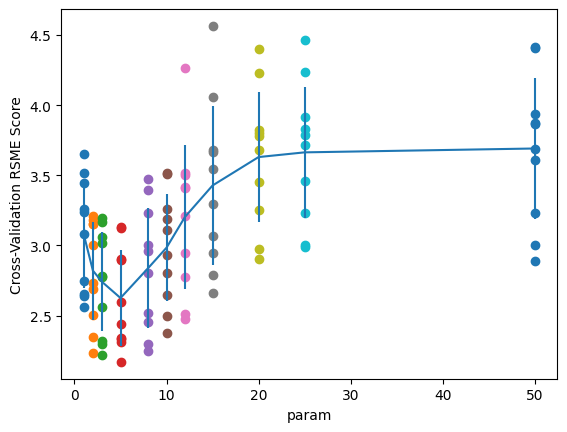

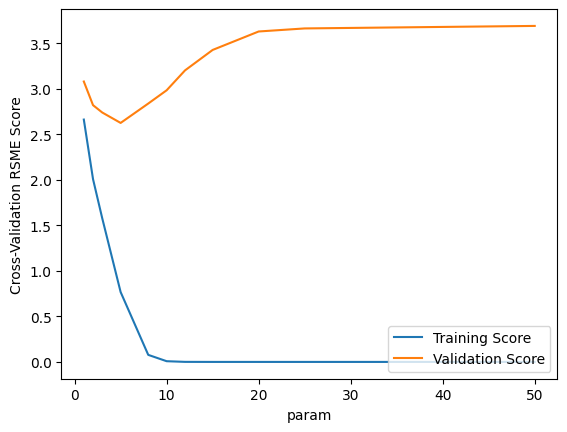

In [103]:
plot_validation_results(param_to_scores)

plot_scores(param_to_scores)

#### 3.2 a) Comparing Tree-Based Regression Models (5 Points)

Run the k-fold cross validation for all 3 regressors and compare and discuss the results! You should see quite a number of differences regarding runtimes, issues of overfitting and underfitting, overall performance, effects of parameter values, etc. You can use the code cells above for cross validation and visualization.

**Your Answer:**

1. DecisionTreeRegressor: The shortest runtime, as it only trains one tree, resulting in lower computational overhead. RandomForestRegressor: Moderate runtime. Since multiple trees need to be trained (each tree is trained independently), it takes longer compared to a single decision tree, but can be accelerated through parallel processing. GradientBoostingRegressor: The longest runtime, as it adopts a stepwise training approach where the training of each tree depends on the results of the previous trees. Therefore, the computational overhead is greater in each training step.
2. DecisionTreeRegressor: When the maximum depth of the tree is small, the model is prone to underfitting, resulting in high training and validation errors. As the depth of the tree increases, the model gradually becomes overfitted, with a significant reduction in training error, but validation error may increase. RandomForestRegressor: Due to the integration of multiple trees, each trained on different samples and subsets of features, the random forest has a strong resistance to overfitting. Even with a large tree depth, the validation error does not easily increase significantly. GradientBoostingRegressor: Gradient boosting regression improves model performance by progressively reducing residuals, but it is also prone to overfitting, especially when the depth of the trees is large. However, due to the presence of the learning rate, the risk of overfitting can be reduced by adjusting the learning rate.
3. DecisionTreeRegressor: Under certain parameter settings (such as a smaller tree depth), RMSE can be relatively high, indicating underfitting. As the depth increases, RMSE decreases, but performance on the validation set does not necessarily improve. RandomForestRegressor: Generally performs better than a single decision tree because ensemble methods can average out errors. In general, as the depth of the trees increases, the training error decreases, but the change in validation error is not significant. GradientBoostingRegressor: In most cases, the performance of gradient boosting regression outperforms that of decision trees and random forests, as it can better fit complex patterns by incrementally improving model performance.
4. For DecisionTreeRegressor and RandomForestRegressor, when the depth is small, the model is prone to underfitting; as the depth increases, the training error decreases rapidly, but it may lead to overfitting. For GradientBoostingRegressor, due to the method of gradually reducing residuals, it can achieve good performance even with shallow trees. However, when the depth is large, care must be taken to avoid overfitting, and it is usually necessary to adjust the learning rate to achieve optimal results. 

#### 3.2 b) Assessing the Evaluation (3 Points)

Discuss if we found the regressor with the cross-validation result from above! There is no need to implement anything here.

**Your Answer:**

First, although cross-validation can estimate the model's generalization ability, the results may vary due to different dataset splits. To obtain more stable results, it may be necessary to use more cross-validation folds or try different random seeds.

Next, certain models like GradientBoostingRegressor may require longer training times. In practical applications, it may be necessary to make trade-offs between performance and training time. 

Finally, although GradientBoostingRegressor usually performs better, it has higher complexity and poorer interpretability. In contrast, a single decision tree may have slightly lower performance but is easier to interpret.